In [ ]:
!pip install pandas==2.0.0

In [ ]:
!pip install pandas==2.0.0
!pip install polars==0.17.7

In [2]:
import pandas as pd 
import polars as pl

import io
import time
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.__version__

'2.0.0'

In [4]:
pl.__version__

'0.17.7'

In [63]:
!pip install pandas==2.0.0
!pip install polars==0.17.7
import pandas as pd 
import polars as pl

import io
import time
import numpy as np
import matplotlib.pyplot as plt



def create_dataframe(n_rows, library):
  if library == 'pandas':
    data = {
      'name': np.random.choice(['Alice', 'Bob', 'Charlie', 'David', 'Eva'], n_rows),
      'age': np.random.randint(18, 65, size=n_rows),
      'city': np.random.choice(['New York', 'San Francisco', 'Los Angeles'], n_rows),
      'income': np.random.normal(50000, 10000, size=n_rows),
      'gender': np.random.choice(['Male', 'Female'], n_rows),
      'is_married': np.random.choice([True, False], n_rows),
      'children': np.random.randint(0, 5, size=n_rows),
      'zip_code': np.random.randint(10000, 99999, size=n_rows),
      'interest_rate': np.random.uniform(0, 0.1, size=n_rows),
      'is_default': np.random.choice([True, False], n_rows)
    }
    return pd.DataFrame(data)

  elif library == 'polars':
    data = {
      'name': np.random.choice(['Alice', 'Bob', 'Charlie', 'David', 'Eva'], n_rows).astype('str'),
      'age': np.random.randint(18, 65, size=n_rows).astype('int'),
      'city': np.random.choice(['New York', 'San Francisco', 'Los Angeles'], n_rows).astype('str'),
      'income': np.random.normal(50000, 10000, size=n_rows).astype('float'),
      'gender': np.random.choice(['Male', 'Female'], n_rows).astype('str'),
      'is_married': np.random.choice([True, False], n_rows).astype('bool'),
      'children': np.random.randint(0, 5, size=n_rows).astype('int'),
      'zip_code': np.random.randint(10000, 99999, size=n_rows).astype('str'),
      'interest_rate': np.random.uniform(0, 0.1, size=n_rows).astype('float'),
      'is_default': np.random.choice([True, False], n_rows).astype('bool')
    }
    return pl.DataFrame(data)

def save_dataframe_to_csv(df, file_name):
  """
  Saves a Pandas or Polars DataFrame to a CSV file.
  :param df: The DataFrame to save.
  :param file_name: The name of the file to save to.
  """
  if isinstance(df, pd.DataFrame):
    df.to_csv(file_name)
  elif isinstance(df, pl.DataFrame):
    df.write_csv(file_name)

def read_dataframe_from_csv(file_name, library):
  """
  Reads a Pandas or Polars DataFrame from a CSV file.
  :param file_name: The name of the CSV file to read from.
  :param library: The library to use - 'pandas' or 'polars'.
  :return: The DataFrame read from the CSV file.
  """
  if library == 'pandas':
    return pd.read_csv(file_name)
  elif library == 'polars':
    return pl.read_csv(file_name)

def sort_dataframe(df, column_name, ascending=True):
  """
  Sorts a Pandas or Polars DataFrame by the values in a given column.
  :param df: The DataFrame to sort.
  :param column_name: The name of the column to sort by.
  :param ascending: Whether to sort in ascending or descending order. Default is ascending.
  :return: The sorted DataFrame.
  """
  if isinstance(df, pd.DataFrame):
    return df.sort_values(by=column_name, ascending=ascending)
  elif isinstance(df, pl.DataFrame):
    return df.sort(column_name, descending=not ascending)

def filter_dataframe(df, column, value):
  """
  Filters a Pandas or Polars DataFrame based on a given condition.
  :param df: The DataFrame to filter.
  :param column: The column to filter on.
  :param value: The value to filter on.
  :return: The filtered DataFrame.
  """
  if isinstance(df, pd.DataFrame):
    return df[df[column] == value]
  elif isinstance(df, pl.DataFrame):
    return df.filter(pl.col(column) == value)

def groupby_dataframe(df, column_name):
  """
  Groups a Pandas or Polars DataFrame by a given column name.
  :param df: The DataFrame to group.
  :param column_name: The name of the column to group by.
  :return: The grouped DataFrame.
  """
  start_time = time.time()
  result = df.groupby(column_name)
  end_time = time.time()
  return end_time - start_time
  
def compare_runtimes(pandas_times, polars_times):
  """
  Compares runtimes of Pandas and Polars for various operations.
  :param pandas_times: A dictionary containing the runtimes for various operations for Pandas.
  :param polars_times: A dictionary containing the runtimes for various operations for Polars.
  """
  fig, ax = plt.subplots(figsize=(12, 4))

  # Setting the title and labels for the graph
  ax.set_title("Comparison of Runtimes for Pandas and Polars")
  ax.set_xlabel("Operations")
  ax.set_ylabel("Time (Seconds)")

  # Creating a bar graph for Pandas and Polars runtimes
  operations = pandas_times.keys()
  num_operations = len(operations)
  bar_width = 0.35
  pandas_x = np.arange(num_operations)
  polars_x = pandas_x + bar_width

  pandas_y = list(pandas_times.values())
  polars_y = list(polars_times.values())

  pandas_bar = ax.bar(pandas_x, pandas_y, bar_width, color='tab:blue', label='Pandas')
  polars_bar = ax.bar(polars_x, polars_y, bar_width, color='tab:orange', label='Polars')

  # Setting the x-axis ticks and labels
  ax.set_xticks(pandas_x + bar_width / 2)
  ax.set_xticklabels(operations)

  # Setting the y-axis limit as the maximum of the two maximum values of runtimes
  ax.set_ylim(0, max(max(pandas_y), max(polars_y)) * 1.2)

  # Adding values on top of the bars
  for i, bars in enumerate(zip(pandas_bar, polars_bar)):
    for bar in bars:
      height = bar.get_height()
      ax.annotate(f"{height:.4f}", xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

  # Adding a legend to the graph
  ax.legend()

  # Displaying the graph
  plt.show()

In [30]:
pandas_times = {'Create': 0.0, 'Save': 0.0, 'Read': 0.0, 'Sort': 0.0, 'Filter': 0.0, 'GroupBy': 0.0}
polars_times = {'Create': 0.0, 'Save': 0.0, 'Read': 0.0, 'Sort': 0.0, 'Filter': 0.0, 'GroupBy': 0.0}

n_rows = 1000000
file_name_pan = 'data_pandas.csv'
file_name_pol = 'data_polar.csv'

In [31]:
# Creating DataFrames
start_time = time.time()
df_pandas = create_dataframe(n_rows, 'pandas')
pandas_times['Create'] = time.time() - start_time

start_time = time.time()
df_polars = create_dataframe(n_rows, 'polars')
polars_times['Create'] = time.time() - start_time

In [32]:
# Saving DataFrames
start_time = time.time()
save_dataframe_to_csv(df_pandas, file_name_pan)
pandas_times['Save'] = time.time() - start_time

start_time = time.time()
save_dataframe_to_csv(df_polars, file_name_pol)
polars_times['Save'] = time.time() - start_time

In [33]:
# Reading DataFrames
start_time = time.time()
df_pandas = read_dataframe_from_csv(file_name_pan, 'pandas')
pandas_times['Read'] = time.time() - start_time

start_time = time.time()
df_polars = read_dataframe_from_csv(file_name_pol, 'polars')
polars_times['Read'] = time.time() - start_time

In [34]:
# Sorting DataFrames
start_time = time.time()
sort_dataframe(df_pandas, 'gender', ascending=True)
pandas_times['Sort'] = time.time() - start_time

start_time = time.time()
sort_dataframe(df_polars, 'gender', ascending=True)
polars_times['Sort'] = time.time() - start_time

In [35]:
# Filtering DataFrames
start_time = time.time()
filter_dataframe(df_pandas, 'gender', 'Male')
pandas_times['Filter'] = time.time() - start_time

start_time = time.time()
filter_dataframe(df_polars, 'gender', 'Male')
polars_times['Filter'] = time.time() - start_time

In [36]:
pandas_times['GroupBy'] = groupby_dataframe(df_pandas, 'zip_code')
polars_times['GroupBy'] = groupby_dataframe(df_polars, 'zip_code')

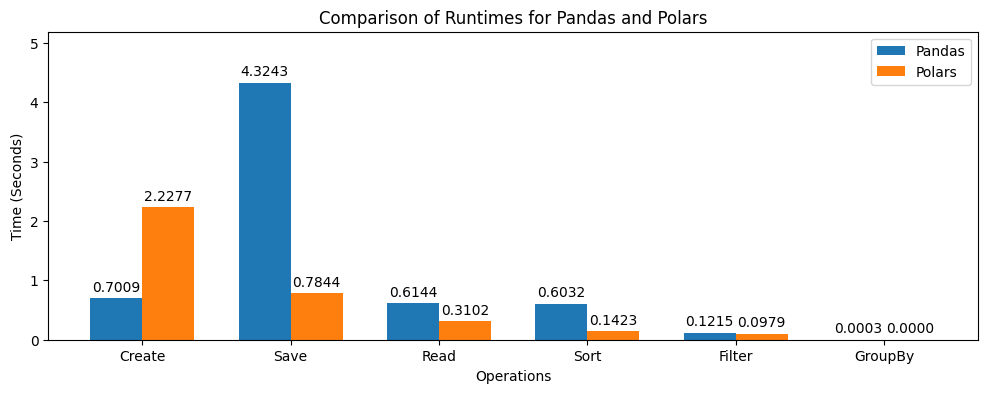

In [65]:
# Comparing runtimes
compare_runtimes(pandas_times, polars_times)